In [2]:
from google.colab import files
uploaded = files.upload()

Saving 03_qty_winsor.csv to 03_qty_winsor.csv


In [1]:
import os
os.makedirs("../results/eda_visualizations", exist_ok=True)


In [3]:

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../results/outputs/02_outlier_capped_quantity.csv", parse_dates=["InvoiceDate"])

# Clean Customer ID & Invoice
df["Customer ID"] = df["Customer ID"].astype(int).astype(str)
df["Invoice"] = df["Invoice"].astype(str).str.strip()

# Create TotalPrice
df["TotalPrice"] = df["Quantity_winsor"] * df["Price"]

# Snapshot date
snapshot_date = df["InvoiceDate"].max().normalize() + pd.Timedelta(days=1)

# Recency
last_purchase = (
    df.loc[~df["is_return"]]
      .groupby("Customer ID")["InvoiceDate"]
      .max()
)
R = (snapshot_date - last_purchase).dt.days

# Frequency
F = (
    df.loc[~df["is_return"]]
      .groupby("Customer ID")["Invoice"]
      .nunique()
)

# Monetary
M = (
    df.loc[~df["is_return"]]
      .groupby("Customer ID")["TotalPrice"]
      .sum()
      .clip(lower=0)
)

# Combine
rfm = pd.DataFrame({"R": R, "F": F, "M": M})
rfm.to_csv("../results/outputs/IT24100257_rfm_table.csv", index=True)

print(" RFM table created and saved as rfm_table.csv")
rfm.head()



 RFM table created and saved as rfm_table.csv


,R,F,M
Customer ID,,,
12346,325,12,400.94
12347,2,8,5287.51
12348,75,5,1072.23
12349,18,4,4388.34
12350,310,1,334.40


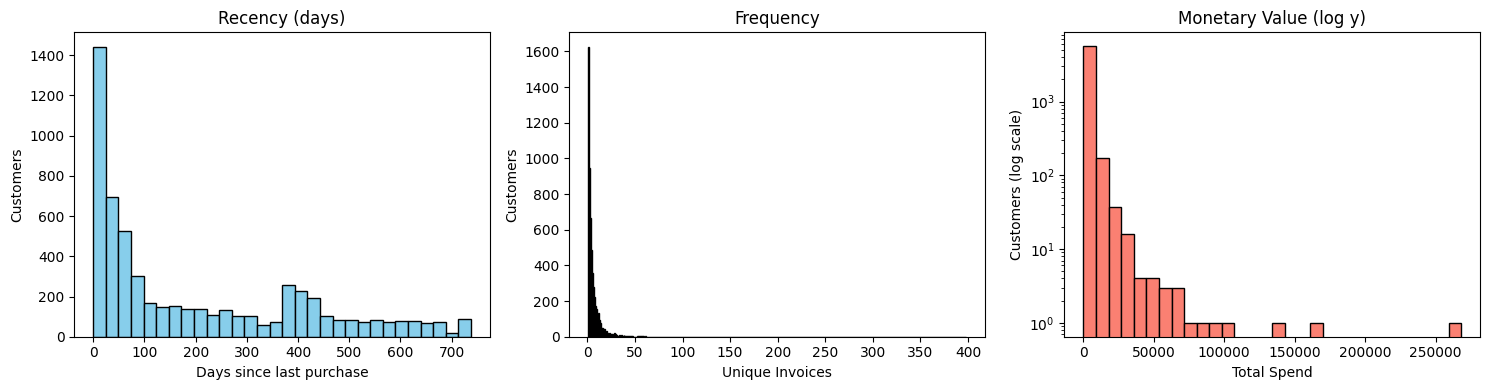

In [6]:
plt.figure(figsize=(15, 4))

# Recency
plt.subplot(1, 3, 1)
plt.hist(rfm["R"], bins=30, color="skyblue", edgecolor="black")
plt.title("Recency (days)")
plt.xlabel("Days since last purchase")
plt.ylabel("Customers")

# Frequency
plt.subplot(1, 3, 2)
plt.hist(rfm["F"], bins=range(1, rfm["F"].max() + 1), color="lightgreen", edgecolor="black")
plt.title("Frequency")
plt.xlabel("Unique Invoices")
plt.ylabel("Customers")

# Monetary
plt.subplot(1, 3, 3)
plt.hist(rfm["M"], bins=30, color="salmon", edgecolor="black", log=True)
plt.title("Monetary Value (log y)")
plt.xlabel("Total Spend")
plt.ylabel("Customers (log scale)")

plt.tight_layout()
plt.savefig("../results/eda_visualization/IT24100257_rfm_histograms.png")
plt.show()


In [ ]:
files.download("IT24100257_rfm_table.csv")
files.download("../results/eda_visualization/IT24100257_rfm_histograms.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>